<h1><center>
    ECE 438: Digital Signal Processing with Applications<br/>
    Lab 3: Frequency Analysis<br/>
    <small>Date: 09-14-2024</small><br/>
    <small>Section: 006</small><br>
</center></h1>

|Name |Signature |Time spent outside lab|
|:---:|:---:|:---:|
|David Mendoza [---%]| | |

||Below expectations| Lacks in some respect|Meets all expectations|
|:---:|:---:|:---:|:---:|
|**Completeness of the report**||||
|**Organization of the report**||||
|**Quality of figures**: *Correctly labeled with title, x-axis, y-axis, and name(s)*||||
|**Ability to compute Fourier series expansion and synthesize periodic signals using the expansion in Simulink (26 pts)**: *Derivation and sketch, plots of synthesized signals, questions*||||
|**Understanding of modulator and CT system analysis (26 pts)**: *Output plots, questions*||||
|**Implementation of DTFT (21 pts)**: *Python function, DTFT’s magnitude and phase plots*||||
|**DT system analysis (27 pts)**: *Exercises in 5.2, completed block diagram, table of measurements, impulse and frequency response*||||

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# make sure the plot is displayed in this notebook
%matplotlib inline
# specify the size of the plot
plt.rcParams['figure.figsize'] = (8, 4)

# for auto-reloading extenrnal modules
%load_ext autoreload
%autoreload 2

<h3 style="color:red;"><left>Exercise 2.1</left></h3>

**1. For each of these two signals, do the following on a blank sheet of paper (or type the equations in the Markdown cell if you are familiar with LaTex):**
* **Compute the Fourier series expansion in the form**
\begin{equation}
    s(t)=a_0+\sum_{k=1}^\infty A_k\sin(2\pi kf_0t+\theta_k)
\end{equation}
where $f_0=\frac{1}{T_0}$.

    **Hint :**You may want to use one of the following references:

    Sec. 4.1 of “Digital Signal Processing”, by Proakis and Manolakis, 1996;

    Sec. 4.2 of “Signals and Systems”, by A. Oppenheim and A. Willsky, 1983;

    Sec. 3.3 of “Signals and Systems”, A. Oppenheim and A. Willsky, 1997.

    Note that in the expression above, the function in the summation is $\sin(2\pi kf_0 t + \theta k )$, rather than a complex sinusoid. The formulas in the above references must be modified to accommodate this. You can compute the cos/sin version of the Fourier series, then convert the coefficients.

<img src="calc1.JPEG" alt="calc1" width="600"/>

**2. Write code to approximate the two signals using the Fourier series expansion above. Use 200 (instead of infinite number of) Sine waves. Then, plot these two signals.**

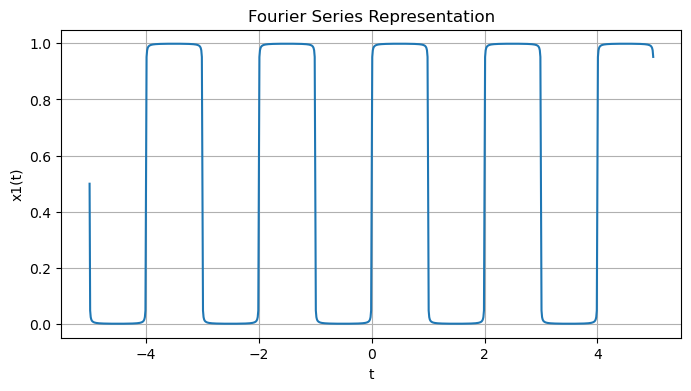

In [4]:
t = np.arange(-5, 5, 0.01)

a0 = 1 / 2
x = a0

for i in range(1, 200):
    x += ((1 - np.power(-1, i)) * np.sin(i * np.pi * t) / (i * np.pi))

plt.plot(t, x)
plt.title("Fourier Series Representation")
plt.xlabel("t")
plt.ylabel("x1(t)")
plt.grid(True)
plt.show()

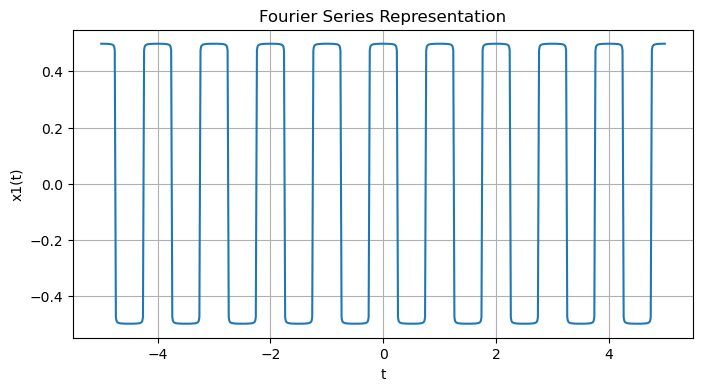

In [5]:
t = np.arange(-5, 5, 0.01)

a0 = 0
x = a0

for i in range(1, 200):
    x += np.sin(i * np.pi/2)*(np.sin((i *2* np.pi * t)+(np.pi/2)) / (i * np.pi/2))

plt.plot(t, x)
plt.title("Fourier Series Representation")
plt.xlabel("t")
plt.ylabel("x1(t)")
plt.grid(True)
plt.show()

<h3 style="color:red;"><left>Exercise 4.1</left></h3>

**1. Hand in plots of the Spectrum Analyzer output for each of the three synthesized waveforms.** 

* Waveform 1

<img src="Wave1.png" style="width:60%;height:30%;">

* Waveform 2

<img src="Wave2.png" style="width:60%;height:30%;">

* Waveform 3

<img src="Wave3.png" style="width:60%;height:30%;">


**2. For each case in Q1, comment on how the synthesized waveform differs from the desired signal,and on the structure of the spectral density.**

For each case we can observe how the synthesized waveform approximates well the desired signal, however, because we could only use a limited number of different frequency components it keeps some oscillatory behavior around the edges of the signal. If we were to increase to more frequency components, the edges would have the sharp appearance we desire. On the other hand, if we analyze the spectral density plot, we can observe how it has peaks for all the frequencies that we used to synthesize the signal. As well, for waveform 2 we can see there is a peak at 0 frequency because this signal has a steady component of 1/2.

<h3 style="color:red;"><left>Exercise 4.2</left></h3>

**1. Hand in plots of the output of the *Spectrum Analyzer* for each signal.**

* Pulse width=1 sec | period=2sec | frequency=10Hz

<img src="Modulation1.png" style="width:50%;height:20%;">

* Pulse width=1 sec | period=2sec | frequency=15Hz

<img src="Modulation2.png" style="width:50%;height:20%;">

* Pulse width=1 sec | period=3sec | frequency=10Hz

<img src="Modulation3.png" style="width:50%;height:20%;">

* Pulse width=1 sec | period=6sec | frequency=10Hz

<img src="Modulation4.png" style="width:50%;height:20%;">

**2. What effect does changing the modulating frequency have on the spectral density?**

The spectral density is centered around the modulating frequency, so changing the modulating frequency represents a shift of the spectral density. We can observe that when f=10Hz the spectral density remains centered here, meanwhile for f=15Hz it shifts 5 Hz to the right. This is because the main frequency component of the signal is the one of the carrier. 

**3. Why does the spectrum have a comb structure and what is the spectral distance between impulses? Why?**

The spectrum has a comb structure because the representation of a periodic signal as a Fourier series will be the sum of its sinusoidal components which frequency is spaced by 1/T. In the first two cases we can observe that because the period of the signal we are modulating is 2s, the spectrum comb structure is spaced by 0.5Hz. However, as we increase the period, for cases 3 and 4, we can observe how more components appear as they are spaced by 0.3Hz and 0.16Hz respectively.

**4. What would happen to the spectral density if the period of the triangle pulse were to
increase toward infinity? (in the limit)**  

If the period of the triangle pulse were to increase toward infinity we would consider that the spacing between the comb structures would be close to 0, meaning that it would stop being a comb structure but become a continuous spectrum. This would mean that the signal's energy would be spread across an interval of continuous frequencies, instead of discrete frequency components.

<h3 style="color:red;"><left>Exercise 4.3</left></h3>

**1. Hand in the printout of the output of the Network Analyzer (magnitude and phase of the
frequency response, and the impulse response).**

* Network Analyzer

<img src="Network1.png" style="width:60%;height:90%;">

**2. Hand in the plot of the impulse response obtained using a unit step.**

* Impulse Response

<img src="impulse.png" style="width:60%;height:90%;">

**3. What are the advantages and disadvantages of each method?**

The main advantages of the network analyzer is that it allows to get the frequency response information and impulse response directly. However, we cannot analyze the impulse response in detail with the plots obtained from the network analyzer which is when the second method would become more useful. 

<h3 style="color:red;"><left>Exercise 5.1</left></h3>

**1. Complete the follwing function that computes the DTFT of a discrete-time signal.** 
```python
def DTFT(x,n0,w):
    """
    This function computes the DTFT of a discrete-time signal.
    
    Parameters
    ---
    x: the discrete-time signal
    n0: time index corresponding to the 1st element of the x vector
    w: frequencies
    
    Returns
    ---
    X: the computed DTFT
    """
    pass
```
**Note that if ```x``` is a vector of length $N$, then its DTFT is computed by**

\begin{equation}
    X(\omega)=\sum_{n=0}^{N-1}x[n]e^{-jw(n+n0)}
\end{equation}

**where $w$ is a vector that contains the frequencies from $-\pi$ to $\pi$.**

**Hint:** In Python, ```1j``` is defined as $\sqrt{-1}$. Use `np.exp(x)` to calculate $e^x$.

In [14]:
def DTFT(x,n0,w):  
    X_w = np.zeros_like(w, dtype=complex)  # Initialize complex DTFT result
    for i in range(len(x)):
        X_w +=  x[i] * (np.exp(-1j * w * (i+n0)))
    return X_w

**2. For the following signals** 

* $x[n]=\delta[n]$
* $x[n]=\delta[n-5]$
* $x[n]=(0.5)^nu[n]$

**use your DTFT function to compute $X(\omega)$, and plots its magnitude and phase.**

**Hint**: Use `np.power(a,b)` to calculate $a^b$. Use ```np.abs()``` and ```np.angle()``` to compute the magnitude and phase.

Text(0.5, 0, 'w')

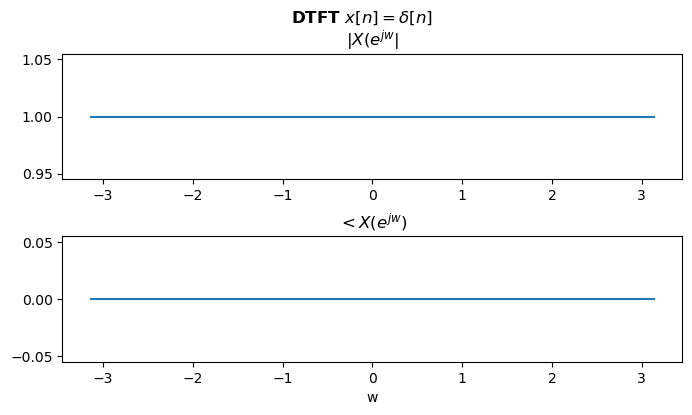

In [29]:
w = np.arange(-np.pi, np.pi, 0.01)
n0=-10
n = np.arange(n0, 10, 1)
d = np.zeros_like(n)
d_5 = np.zeros_like(n)
u = np.zeros_like(n)
x = np.zeros_like(n)

d = (n == 0).astype(float)
d_5 = (n == 5).astype(float)
u = (n >= 0).astype(float)
x = np.power(0.5,n) *u

X_w1 = DTFT(d, n0, w)
X_w1_m = np.abs(X_w1)
X_w1_ang = np.angle(X_w1)

plt.figure()
plt.subplots_adjust(bottom=0.1, 
                    top=0.87, 
                    hspace=0.45)
plt.suptitle('DTFT $x[n]=\delta [n]$', weight='bold')

plt.subplot(2,1,1)
plt.plot(w,X_w1_m)
plt.title('$|X(e^{jw}|$')
plt.subplot(2,1,2)
plt.title('$< X(e^{jw})$')
plt.plot(w,X_w1_ang)
plt.xlabel('w')

<Figure size 800x400 with 0 Axes>

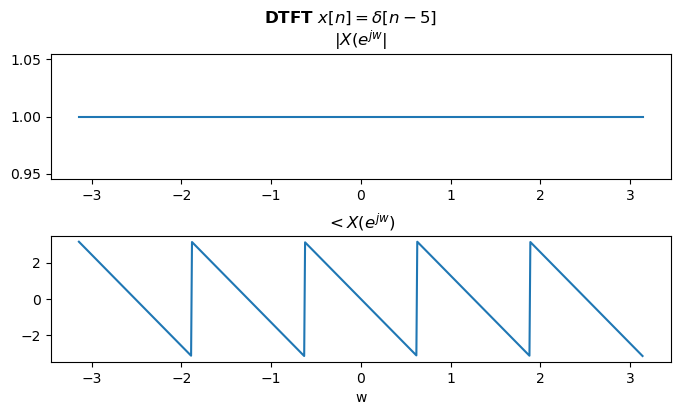

In [28]:
plt.figure()

X_w2 = DTFT(d_5, n0, w)
X_w2_m = np.abs(X_w2)
X_w2_ang = np.angle(X_w2)
plt.figure()
plt.subplot(2,1,1)
plt.plot(w,X_w2_m)
plt.title('$|X(e^{jw}|$')
plt.subplot(2,1,2)
plt.plot(w,X_w2_ang)
plt.title('$< X(e^{jw})$')
plt.xlabel('w')

plt.suptitle('DTFT $x[n]=\delta [n-5]$', weight='bold')
plt.subplots_adjust(bottom=0.1, 
                    top=0.87, 
                    hspace=0.45)

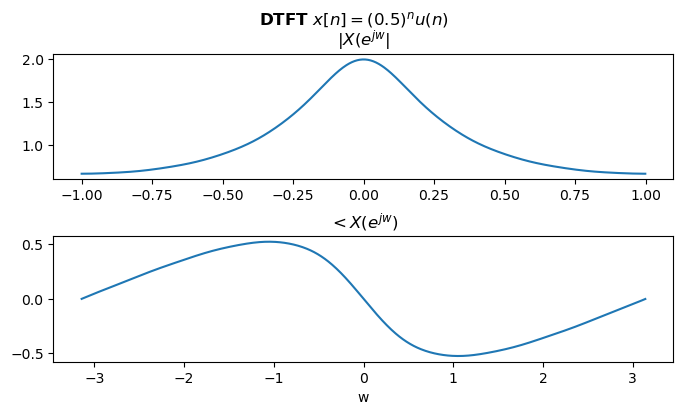

In [26]:
X_w3 = DTFT(x, n0, w)
X_w3_m = np.abs(X_w3)
X_w3_ang = np.angle(X_w3)
plt.figure()
plt.subplot(2,1,1)
plt.plot(w/np.pi,X_w3_m)
plt.title('$|X(e^{jw}|$')
plt.subplot(2,1,2)
plt.plot(w,X_w3_ang)
plt.title('$< X(e^{jw})$')
plt.xlabel('w')

plt.suptitle('DTFT $x[n]=(0.5)^{n} u(n)$', weight='bold')
plt.subplots_adjust(bottom=0.1, 
                    top=0.87, 
                    hspace=0.45)

<h3 style="color:red;"><left>Exercise 5.2: Magnitude and Phase of the Frequency Response of a Discrete-Time Systems</left></h3>

Consider the discrete-time system described by the following difference equation:

\begin{equation}y[n]=0.9y[n-1]+0.3x[n]+0.24x[n-1]\end{equation}

Assume that the system is **causal**.

**1. Draw a system diagram.**

<img src="diagram.png" style="width:60%;height:90%;">

**2. Obtain the impulse response of the system by replacing $x[n]$ with $\delta[n]$ in the above equation. (Use causality to set up the initial conditions.)**

\begin{equation}h[n]=0.9h[n-1]+0.3\delta[n]+0.24\delta[n-1]\end{equation}

$y[n]=0$ for all n<0
$y[-1]=0$ 

=> $h[0]=0.3$

$h[1]=0.9(0.3)+(0.3\delta[1]+0.24\delta[0]) = 0.51$

$h[2]=0.9(0.51)+(0.3\delta[2]+0.24\delta[1])=0.459$

$h[3]=0.9(0.459)+(0.3\delta[3]+0.24\delta[2])=0.4131$

For n>0 we can observe that it follows the relation $(0.51)(0.9^{n-1})$

Therefore, we can express h[n] as

\begin{equation}h[n]=0.3\delta[n]+0.51(0.9^{n-1})u[n-1]\end{equation}

**3. Use your answer in Q2 to obtain the frequency response of the system.**

Using the DTFT formula we get that

\begin{equation}H(\omega)=0.3+0.51* (e^{-j\omega}) \dfrac{1}{1-0.9e^{-j\omega}}\end{equation}

**4. Find the frequency response of the system using another method. Specifically, take the DTFT of the left-hand-side and right-hand-side of the difference equation, and then use linearity and the time-shifting property of the DTFT along with the fact that $H(\omega)=\frac{Y(\omega)}{X(\omega)}$**

<img src="calc2.JPEG" style="width:60%;height:90%;">

**5. Write Python code to compute and plot the magnitude and phase responses, $|H(\omega)|$ and $\angle H(\omega)$, for $-\pi<\omega<\pi$.**

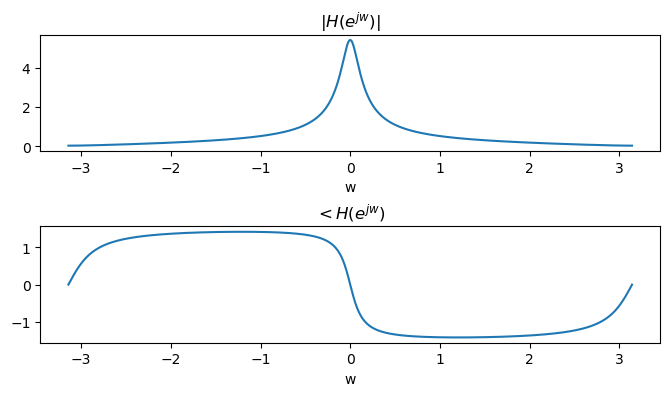

In [24]:
w = np.arange(-np.pi, np.pi, 0.0001)
H_w = np.zeros_like(w, dtype=complex)
H_w = (0.3+np.exp(-1j*w)*0.24)/(1-np.exp(-1j*w)*0.9)
H_w_m = np.abs(H_w)
H_w_ang = np.angle(H_w)

plt.figure()
plt.subplot(2,1,1)
plt.plot(w,H_w_m)
plt.title('$|H(e^{jw})|$')
plt.xlabel('w')
plt.subplot(2,1,2)
plt.plot(w,H_w_ang)
plt.title('$< H(e^{jw})$')
plt.xlabel('w')

plt.subplots_adjust(bottom=0.1, 
                    top=0.87, 
                    hspace=0.65)

<h3 style="color:red;"><left>Exercise 5.3</left></h3>

**1. Insert the printout of your completed block diagram.**

<img src="blockdiagram.png" style="width:60%;height:90%;">

**2. Enter both the amplitude measurements you made and their theoretical values.**

| $\omega$ | Measurements | Theoretical Values |
|:--------:|:------------:|:------------------:|
| $\pi/16$ |       2.534       |            H($\pi/16$) = 2.545        |
|  $\pi/8$ |       1.374       |            H($\pi/8$) = 1.3816       |
|  $\pi/4$ |       0.672       |            H($\pi/4$) = 0.6814        |

**3. Plot the impulse response, and the magnitude and phase of the frequency response by using your DTFT function.**

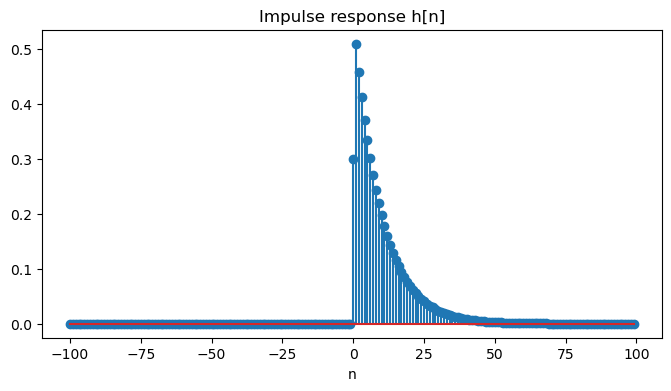

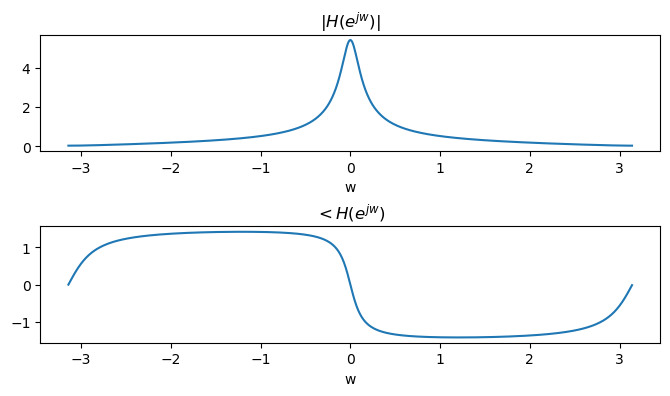

In [22]:
w = np.arange(-np.pi, np.pi, 0.01)
n0=-100
n = np.arange(n0, 100, 1)
d = np.zeros_like(n)
d_1 = np.zeros_like(n)
d = (n == 0).astype(float)
d_1 = (n == 1).astype(float)
u_1 = (n >= 1).astype(float)
h = 0.3*d + 0.51*(np.power(0.9,n-1))*u_1

H_W=DTFT(h, n0, w)
H_W_m = np.abs(H_W)
H_W_ang = np.angle(H_W)


plt.figure()
plt.stem(n,h)
plt.title('Impulse response h[n]')
plt.xlabel('n')

plt.figure()
plt.subplot(2,1,1)
plt.plot(w,H_W_m)
plt.title('$|H(e^{jw})|$')
plt.xlabel('w')
plt.subplot(2,1,2)
plt.plot(w,H_W_ang)
plt.title('$< H(e^{jw})$')
plt.xlabel('w')

plt.subplots_adjust(bottom=0.1, 
                    top=0.87, 
                    hspace=0.65)